# Importing the required libraries

---



In [ ]:

from matplotlib import pyplot as plt
import matplotlib
%matplotlib inline



In [ ]:
import numpy as np 
import pandas as pd

import seaborn as sns
from tqdm import tqdm

from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.naive_bayes import GaussianNB
import xgboost as xgb
        

# Loading the Dataset

In [ ]:
df = pd.read_csv('train.csv')
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0.0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0.0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0.0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3.0,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1.0,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2.0,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


# Dataset Info

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    float64
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(5), int64(1), object(7)
memory usage: 62.5+ KB


In [ ]:
df.describe()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,599.000000,614.000000,614.000000,592.000000,600.00000,564.000000
mean,0.762938,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,1.015216,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,0.000000,150.000000,0.000000,9.000000,12.00000,0.000000
25%,0.000000,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,0.000000,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,2.000000,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,3.000000,81000.000000,41667.000000,700.000000,480.00000,1.000000


# Preprocessing of the dataset

In [ ]:
#finding null values in dataset
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [ ]:
#filling the missing value of categorivccal data
df['Gender'] = df["Gender"].fillna(df['Gender'].mode()[0])
df['Married'] = df["Married"].fillna(df['Married'].mode()[0])
df['Self_Employed'] = df["Self_Employed"].fillna(df['Self_Employed'].mode()[0])
df['Dependents'] = df["Dependents"].fillna(df['Dependents'].mode()[0])

In [ ]:
df['Credit_History'].unique()

array([ 1.,  0., nan])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


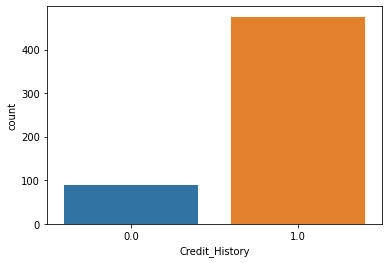

In [ ]:
sns.countplot("Credit_History", data=df)

In [ ]:
# We are replacing credit history NaN values with mode because

# credit history has only 2 unique values and replacing it with mode is better idea

In [ ]:
df['Credit_History'] = df["Credit_History"].fillna(df['Credit_History'].mode()[0])

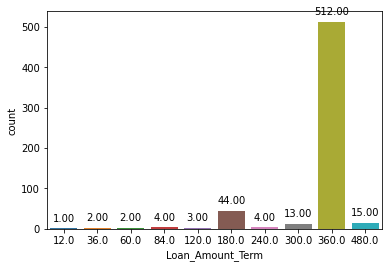

In [ ]:
splot = sns.countplot(x ='Loan_Amount_Term', data = df)
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

In [ ]:
# We are replcing NaN values of Loan_Amount_Term with mode because
# 360 has the highest number of occurence

In [ ]:
df['Loan_Amount_Term'] = df["Loan_Amount_Term"].fillna(df['Loan_Amount_Term'].mode()[0])

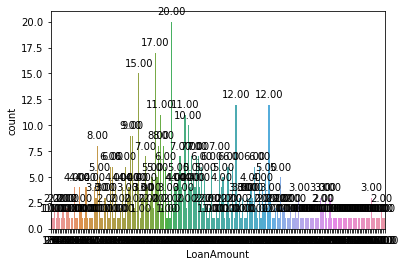

In [ ]:
splot = sns.countplot(x ='LoanAmount', data = df)
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

In [ ]:
# Here we cannot replace the null values with mode.
# Here mean or median will be a better option. 
# We have to check for outliers before replcing NaN values with mean or median.

In [ ]:
# Checking for outliers in "LoanAmount"

Q1 = df['LoanAmount'].quantile(0.25)
Q3 = df['LoanAmount'].quantile(0.75)
IQR = Q3 - Q1

In [ ]:
low_lim = Q1 - 1.5 * IQR
up_lim = Q3 + 1.5 * IQR
print('low_limit is', low_lim)
print('up_limit is', up_lim)

low_limit is -2.0
up_limit is 270.0


In [ ]:
outlier = []
for x in df['LoanAmount']:
    if ((x > up_lim) or (x < low_lim)):
         outlier.append(x)
print('Outlier in the dataset is', outlier)

Outlier in the dataset is [349.0, 315.0, 320.0, 286.0, 312.0, 370.0, 650.0, 290.0, 600.0, 275.0, 700.0, 495.0, 280.0, 279.0, 304.0, 330.0, 436.0, 480.0, 300.0, 376.0, 490.0, 308.0, 570.0, 380.0, 296.0, 275.0, 360.0, 405.0, 500.0, 480.0, 311.0, 480.0, 400.0, 324.0, 600.0, 275.0, 292.0, 350.0, 496.0]


In [ ]:
len(outlier)

39

In [ ]:
# 6.5% of data is in outlier so we will not remove the outliers from the dataset.
# We will replace the NaN values with median because median is not affected by outliers.

In [ ]:
df['LoanAmount'] = df["LoanAmount"].fillna(df['LoanAmount'].median())

In [ ]:
df['Total_Income'] = df['ApplicantIncome'] + df['CoapplicantIncome']
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income
0,LP001002,Male,No,0.0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y,5849.0
1,LP001003,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,6091.0
2,LP001005,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,3000.0
3,LP001006,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,4941.0
4,LP001008,Male,No,0.0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,6000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0.0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y,2900.0
610,LP002979,Male,Yes,3.0,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y,4106.0
611,LP002983,Male,Yes,1.0,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y,8312.0
612,LP002984,Male,Yes,2.0,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y,7583.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    object 
 2   Married            614 non-null    object 
 3   Dependents         614 non-null    float64
 4   Education          614 non-null    object 
 5   Self_Employed      614 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
 13  Total_Income       614 non-null    float64
dtypes: float64(6), int64(1), object(7)
memory usage: 67.3+ KB


# Checking for Data Imbalance 

The percentage of Y class : 0.69
The percentage of N class : 0.31


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


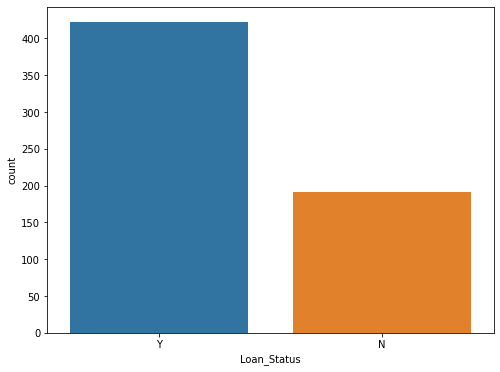

In [ ]:
plt.figure(figsize=(8,6))
sns.countplot(df['Loan_Status']);

print('The percentage of Y class : %.2f' % (df['Loan_Status'].value_counts()[0] / len(df)))
print('The percentage of N class : %.2f' % (df['Loan_Status'].value_counts()[1] / len(df)))


# Exploring the individual features

In [ ]:
df['Loan_Status'].replace('N',0,inplace=True)
df['Loan_Status'].replace('Y',1,inplace=True)

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:670: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


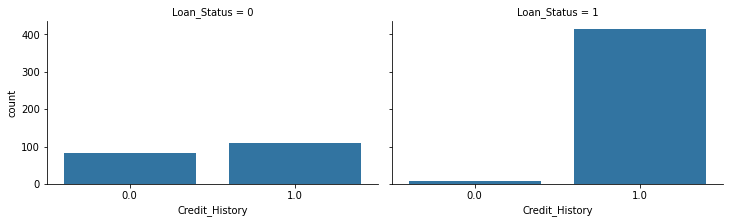

In [ ]:
grid = sns.FacetGrid(df,col='Loan_Status', size=3.2, aspect=1.6)
grid.map(sns.countplot, 'Credit_History');
# Those applicants wo have credit history are more likely to get loan.

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:670: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


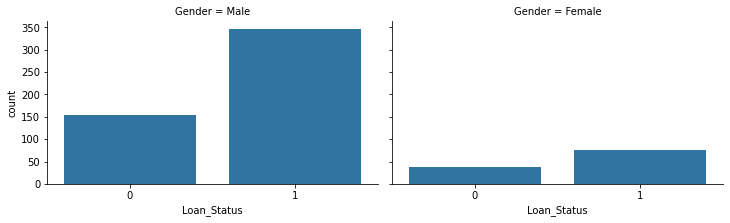

In [ ]:
grid = sns.FacetGrid(df,col='Gender', size=3.2, aspect=1.6)
grid.map(sns.countplot, 'Loan_Status');

# Chances of getting loan to female applicant is higher.

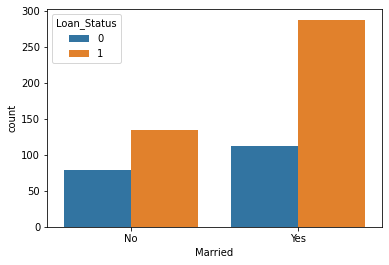

In [ ]:
sns.countplot(x='Married', hue='Loan_Status', data=df);
# Married applicants have higher chances getting loan

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:670: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


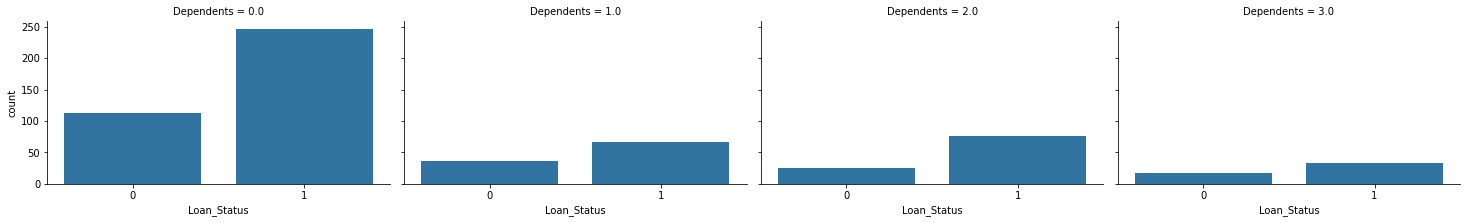

In [ ]:
grid = sns.FacetGrid(df,col='Dependents', size=3.2, aspect=1.6)
grid.map(sns.countplot, 'Loan_Status');

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:670: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


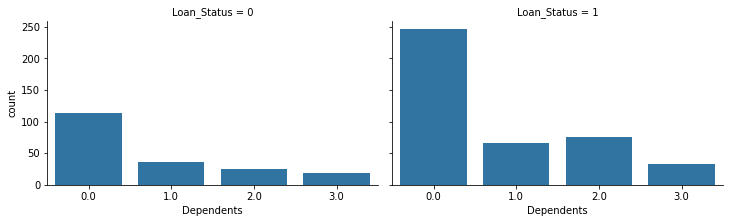

In [ ]:
grid = sns.FacetGrid(df,col='Loan_Status', size=3.2, aspect=1.6)
grid.map(sns.countplot, 'Dependents');

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:670: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


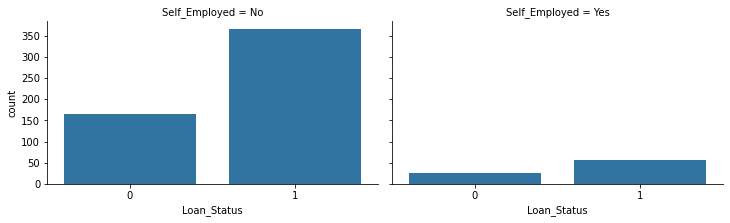

In [ ]:
grid = sns.FacetGrid(df,col='Self_Employed', size=3.2, aspect=1.6)
grid.map(sns.countplot, 'Loan_Status');
# If the applicant is having a job he or she has the higher chances of getting loan.

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:670: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


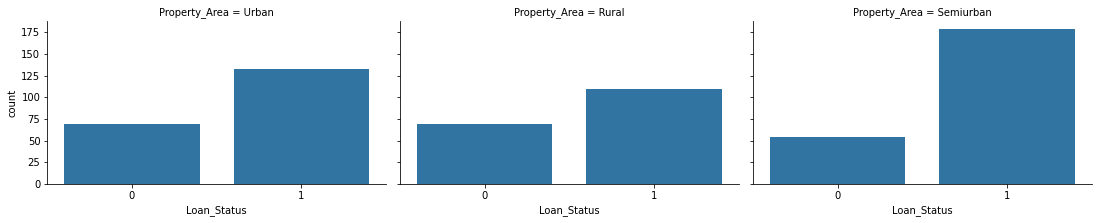

In [ ]:
grid = sns.FacetGrid(df,col='Property_Area', size=3.2, aspect=1.6)
grid.map(sns.countplot, 'Loan_Status');
#Semiurban applicants have higher chances.

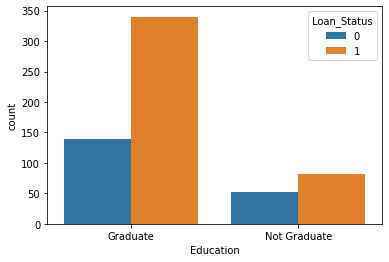

In [ ]:
sns.countplot(x='Education', hue='Loan_Status', data=df);
# Graduate applicants have higher chances of getting loan.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


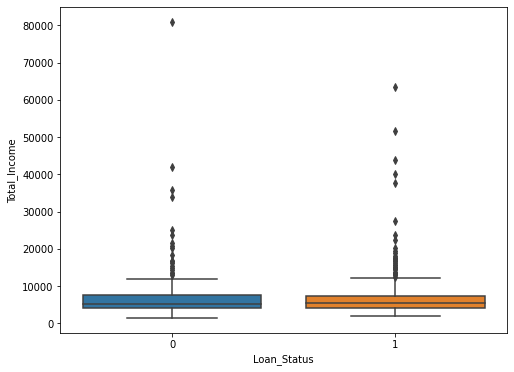

In [ ]:
plt.figure(figsize=(8,6))
sns.boxplot(df['Loan_Status'], df['Total_Income']);
# Total income does not effect the loan status.


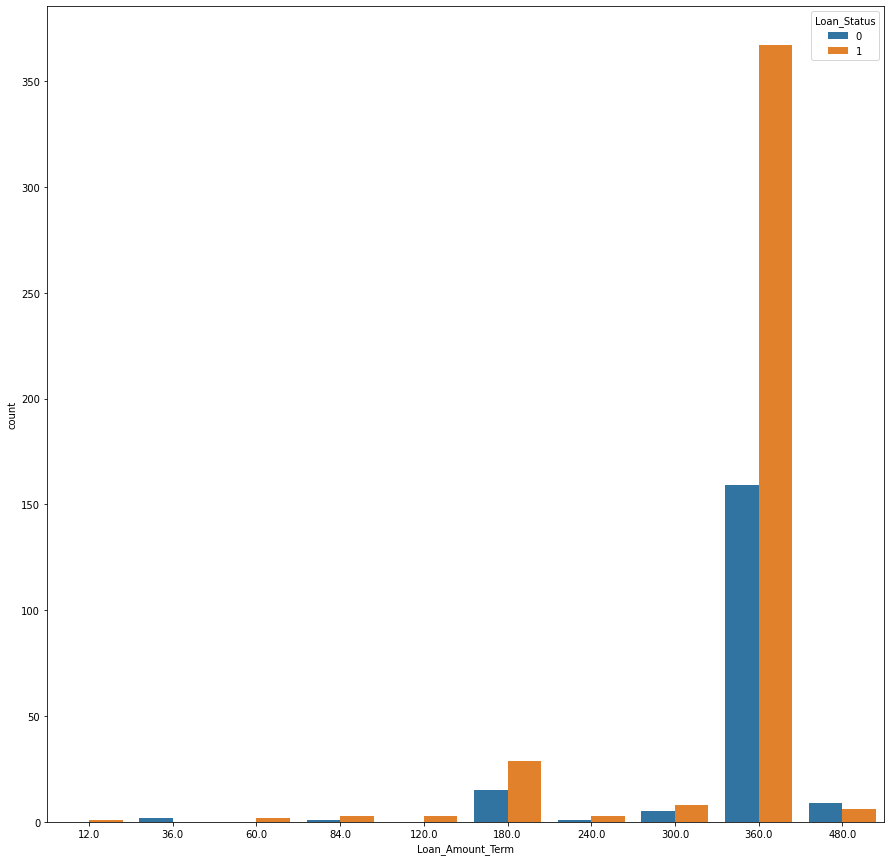

In [ ]:
plt.figure(figsize=(15,15))
sns.countplot(x="Loan_Amount_Term", hue="Loan_Status", data=df)
#no correlation

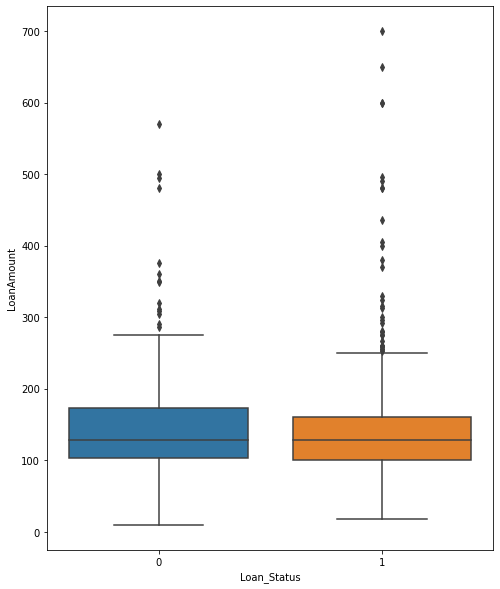

In [ ]:
plt.figure(figsize=(8,10))
sns.boxplot(x="Loan_Status",y="LoanAmount", data=df)

# Label Encoding to categorical data

In [ ]:
from sklearn.preprocessing import LabelEncoder
cols = ['Gender',"Married","Education",'Self_Employed',"Property_Area"]
le = LabelEncoder()
for col in cols:
    df[col] = le.fit_transform(df[col])

In [ ]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income
0,LP001002,1,0,0.0,0,0,5849,0.0,128.0,360.0,1.0,2,1,5849.0
1,LP001003,1,1,1.0,0,0,4583,1508.0,128.0,360.0,1.0,0,0,6091.0
2,LP001005,1,1,0.0,0,1,3000,0.0,66.0,360.0,1.0,2,1,3000.0
3,LP001006,1,1,0.0,1,0,2583,2358.0,120.0,360.0,1.0,2,1,4941.0
4,LP001008,1,0,0.0,0,0,6000,0.0,141.0,360.0,1.0,2,1,6000.0


In [ ]:
# specify input and output attributes
X = df.drop(columns=['Loan_Status','Loan_ID'], axis=1)
y = df['Loan_Status']

In [ ]:
# classifier function
from sklearn.model_selection import cross_val_score
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
def classify(model, x, y):
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
    model.fit(x_train, y_train)
    print("Accuracy is", model.score(x_test, y_test)*100)
    score = cross_val_score(model, x, y, cv=5)
    print("Cross validation is",np.mean(score)*100)
    from sklearn.metrics import confusion_matrix
    y_pred = model.predict(x_test)
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True)

Accuracy is 77.27272727272727
Cross validation is 80.13194722111156


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


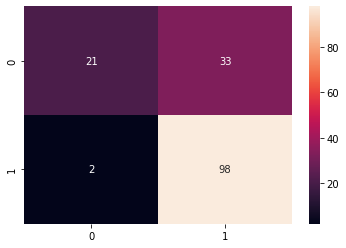

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
classify(model, X, y)

Accuracy is 76.62337662337663
Cross validation is 78.17672930827668


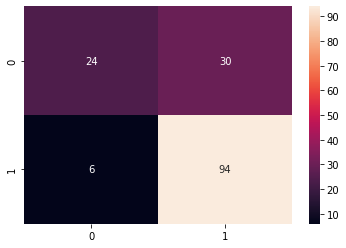

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
classify(model, X, y)

In [ ]:
from sklearn.metrics import confusion_matrix
y_pred = model.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
cm

array([[24, 30],
       [ 6, 94]])

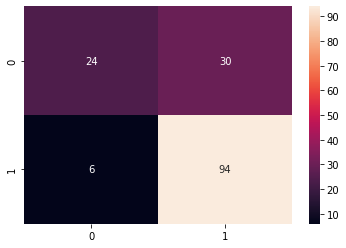

In [ ]:
sns.heatmap(cm, annot=True)

Accuracy is 72.07792207792207
Cross validation is 73.61455417832866


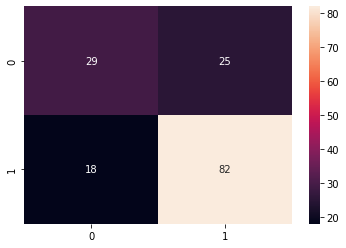

In [ ]:
from sklearn import tree
dt=tree.DecisionTreeClassifier()
classify(dt, X,y)

In [ ]:
from sklearn.metrics import confusion_matrix
y_pred = dt.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
cm

array([[29, 25],
       [18, 82]])

Accuracy is 74.02597402597402
Cross validation is 79.80807676929228


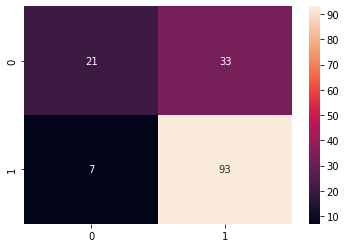

In [ ]:
from xgboost import XGBClassifier
xgb=XGBClassifier(n_estimators=50,max_depth=4)
classify(xgb,X,y)

In [ ]:
from sklearn.metrics import confusion_matrix
y_pred = xgb.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
cm

array([[21, 33],
       [ 7, 93]])

Accuracy is 76.62337662337663
Cross validation is 78.33933093429295


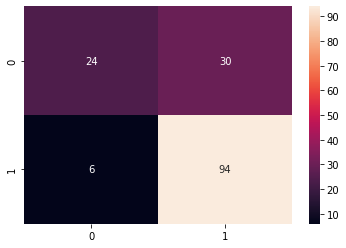

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
adb = AdaBoostClassifier()
classify(adb,X,y)

In [ ]:
from sklearn.metrics import confusion_matrix
y_pred = adb.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
cm

array([[24, 30],
       [ 6, 94]])

Accuracy is 64.93506493506493
Cross validation is 68.56590697054511


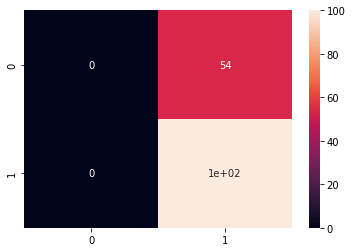

In [ ]:
from sklearn.svm import SVC
svc = SVC()
classify(svc,X,y)

In [ ]:
from sklearn.metrics import confusion_matrix
y_pred = svc.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
cm

array([[  0,  54],
       [  0, 100]])

Accuracy is 65.5844155844156
Cross validation is 68.40197254431561


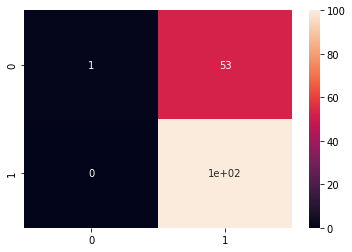

In [ ]:
from sklearn.ensemble import BaggingClassifier
clf = BaggingClassifier(base_estimator=SVC(),n_estimators=10, random_state=0)
classify(clf,X,y)

In [ ]:
from sklearn.metrics import confusion_matrix
y_pred = clf.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
cm

array([[  1,  53],
       [  0, 100]])

Accuracy is 75.32467532467533
Cross validation is 78.17806210848993


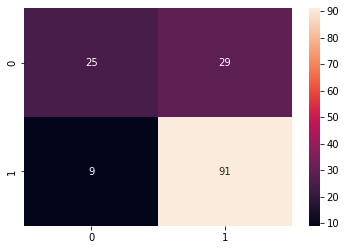

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0)
classify(clf,X,y)

In [ ]:
from sklearn.metrics import confusion_matrix
y_pred = clf.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
cm

array([[25, 29],
       [ 9, 91]])

In [ ]:
models = [('gb', LogisticRegression()),
        ('ada', DecisionTreeClassifier()),
        ('dt', RandomForestClassifier())]

In [ ]:
def fit_models(models, X_train, X_valid, y_train, y_valid):

    #Create variable in which to store predictions for meta-model.
    preds_for_meta = []
    
    #Loop through models in model list.
    for name, model in tqdm(models):
        
        #Fit model and obtain predictions.
        model.fit(X_train, y_train)
        pred = model.predict_proba(X_valid)[:, 1]
        
        #Obtain base moedl roc score.
        roc_base = roc_auc_score(y_valid, pred)
        
        print(f'{model} score: {roc_base}')
        
        #Reshape prediction into single-column matrix.
        pred = pred.reshape(len(pred), 1)
        
        #Append prediction to varible for meta-model.
        preds_for_meta.append(pred)

        #Create 2D array from predictions.
    meta_features = np.hstack(preds_for_meta)
    
    #Define blender for model.
    meta_model = LogisticRegression(
                                 #tree_method='gpu_hist', 
                                 #gpu_id = 0,
                                 random_state = 5)
    
    #Fit meta model on predictions from base models.
    meta_model.fit(meta_features, y_valid.values.ravel())
    print(f'Meta AUC: {roc_auc_score(y_valid, meta_model.predict_proba(meta_features)[:, 1])}')
    
    return meta_model

In [ ]:
def meta_predict(models, meta_model, X_test):
    
    #Variable to store base models' test predictions.
    preds_for_meta = []
    
    #Loop through models to make predictions.
    for name, model in tqdm(models):
        
        #Make predictions with base models.
        pred = model.predict(X_test)
        
        #Reshape prediction.
        pred = pred.reshape(len(pred), 1)
        
        #Append predition to meta-model prediction list.
        preds_for_meta.append(pred)

            #Reshape all predictions into 2D array.
    meta_features = np.hstack(preds_for_meta)
    
    #Make prediction using meta-model.
    meta_preds = meta_model.predict_proba(meta_features)[:, 1]
    
    return meta_preds

In [ ]:

meta_model = fit_models(models,x_train, x_test, y_train, y_test)

  0%|          | 0/3 [00:00<?, ?it/s]

LogisticRegression() score: 0.7931481481481483
DecisionTreeClassifier() score: 0.712037037037037


100%|██████████| 3/3 [00:00<00:00, 10.15it/s]

RandomForestClassifier() score: 0.8048148148148149
Meta AUC: 0.8296296296296297


In [ ]:
test_pred = meta_predict(models, meta_model, x_test)

100%|██████████| 3/3 [00:00<00:00, 85.39it/s]


In [ ]:
test = x_test
predictions = pd.DataFrame()
predictions["claim"] = test_pred
predictions.to_csv('submission.csv', index=False, header=predictions.columns)